In [1]:
data_path = '../datasets/grants.train.xml'

In [2]:
!pip install lxml

In [3]:
%matplotlib inline
import pandas as pd
from lxml import objectify
import io

# Explore the data

In [4]:
def fix_line(line):
    fields = line.split('\t', 5)
    assert len(fields) <= 6
    fields[-1] = fields[-1].replace('\t', ' ')
    return '\t'.join(fields)

def fix_data_file(path):
    with open(path) as f:
        lines = [fix_line(l.rstrip()) for l in f]
    print(repr('\n'.join(lines)[:2000]))
    return io.StringIO('\n'.join(lines))

In [5]:
column_names = ['id1', 'id2', 'freq', 'org_xml1', 'org_xml2', 'matched_id', 'matched_name']
grants_df = pd.read_csv(data_path, header=None, names=column_names, sep='\t', dtype=str)

In [6]:
grants_df.sample(10)

,id1,id2,freq,org_xml1,org_xml2,matched_id,matched_name
42,70,92115922202,1,"<affiliation country=""us"">HEART, LUNG, AND BLO...","<affiliation country=""us""><org type="""" id=""600...",60005281,"National Heart, Lung, and Blood Institute"
528,766,90761784802,1,"<affiliation country=""us"">GEORGIA HEALTH SCIEN...","<affiliation country=""us""><org type="""" id=""600...",60024399,Medical College of Georgia
1387,1943,90752998802,1,"<affiliation country=""us"">IHC Health Services,...","<affiliation country=""us""><org type="""" id=""0"">...",NaN,NaN
418,598,70916021002,1,"<affiliation country=""us"">New York State Depar...","<affiliation country=""us""><org type="""" id=""600...",60013040,New York State Department of Transportation
1436,2008,70424722802,1,"<affiliation country=""us"">KS Dept of Health &a...","<affiliation country=""us""><org type="""" id=""600...",60014903,Kansas Department of Health and Environment
1394,1953,82210688802,1,"<affiliation country=""us"">Miami University, 50...","<affiliation country=""us""><org type="""" id=""600...",60032706,Miami University Oxford
2723,3864SD,68957929302,1,"<affiliation country=""us"">MICHIGAN DEPARTMENT ...","<affiliation country=""us""><org type="""" id=""0"">...",NaN,NaN
467,677,94670987502,17,"<affiliation country=""de"">HELMHOLTZ-ZENTRUM GE...","<affiliation country=""de""><org type="""" id=""0"">...",NaN,NaN
372,523,70007976602,1,"<affiliation country=""us"">UNIVERSITY OF ARKANS...","<affiliation country=""us""><org type="""" id=""600...",60024885,University of Arkansas for Medical Sciences
3188,4531,64090341402,1,"<affiliation country=""us"">CITY OF DURHAM HOUSI...","<affiliation country=""us""><org type="""" id=""0"">...",NaN,NaN


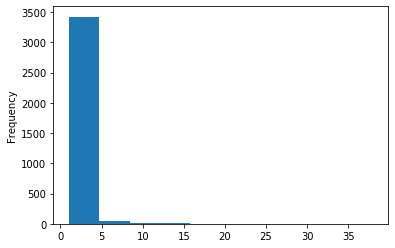

In [7]:
_ = grants_df.freq.astype(int).plot.hist()

In [8]:
grants_df.describe()

,id1,id2,freq,org_xml1,org_xml2,matched_id,matched_name
count,3512,3512,3512,3512,3512,2059,2059
unique,3512,3512,21,3040,3095,795,795
top,4016,90749932702,1,<affiliation>World</affiliation>,<affiliation>World</affiliation>,60005248,Johns Hopkins University
freq,1,1,3248,16,16,32,32


In [9]:
grants_df.matched_name.value_counts()

Johns Hopkins University                                              32
University of Pennsylvania                                            31
University of California, Los Angeles                                 26
University Michigan Ann Arbor                                         25
Washington University in St. Louis                                    22
                                                                      ..
Community Connections                                                  1
Stevens Institute of Technology                                        1
Hope College                                                           1
Veterans Health Administration, U.S. Department of Veteran Affairs     1
University of Tennessee Health Science Center                          1
Name: matched_name, Length: 795, dtype: int64

In [10]:
def extract_org_str(org_xml):
    xml_obj = objectify.parse(io.StringIO(org_xml))
    return xml_obj.getroot().text

grants_df['org_str'] = grants_df.org_xml1.apply(extract_org_str)

In [11]:
_ = grants_df[['org_xml1', 'org_str']].sample(10).apply(lambda row: print(row[0], '\n-->', row[1]), axis=1)

<affiliation country="us">UNIVERSITY OF ROCHESTER, OBSTETRICS &amp; GYNECOLOGY, ROCHESTER, NY, 146270140</affiliation> 
--> UNIVERSITY OF ROCHESTER, OBSTETRICS & GYNECOLOGY, ROCHESTER, NY, 146270140
<affiliation country="us">INDIANA UNIV-PURDUE UNIV AT INDIANAPOLIS, EMERGENCY MEDICINE, INDIANAPOLIS, IN, 462022915</affiliation> 
--> INDIANA UNIV-PURDUE UNIV AT INDIANAPOLIS, EMERGENCY MEDICINE, INDIANAPOLIS, IN, 462022915
<affiliation country="us">Tides Center</affiliation> 
--> Tides Center
<affiliation country="us">CLINICAL SCIENCES</affiliation> 
--> CLINICAL SCIENCES
<affiliation>Mental Health Advocacy Coalition</affiliation> 
--> Mental Health Advocacy Coalition
<affiliation country="us">York University</affiliation> 
--> York University
<affiliation country="us">Mclean County, 104 W. Front Street, Bloomington, IL, 61701</affiliation> 
--> Mclean County, 104 W. Front Street, Bloomington, IL, 61701
<affiliation country="us">Lehigh University</affiliation> 
--> Lehigh University
<affi

# Run generic classifier through the data

In [12]:
import sys
sys.path.append('../generic-classifier/')
import classifyGenericModified

In [13]:
grants_df['prediction'] = grants_df.org_str.apply(classifyGenericModified.classifyOrg)

Loading dictionary...
Loading dictionary done in 26.95 sec.


In [14]:
_ = grants_df[['org_str', 'prediction']].sample(10).apply(lambda row: print(row[0], '-->', row[1]), axis=1)

EMORY UNIVERSITY, ATLANTA, GA, 30322 --> SPE
PONCE SCHOOL OF MEDICINE, BIOCHEMISTRY, PONCE, PR, 007327004 --> SPE
CLINICAL CENTER --> GEN
SOUTHWEST RESEARCH INSTITUTE --> GEN
INDIANA UNIV-PURDUE UNIV AT INDIANAPOLIS, MICROBIOLOGY/IMMUN/VIROLOGY, INDIANAPOLIS, IN, 462025167 --> SPE
Institut f𲠇eophysik ETH Z𲩣h --> GEN
UNIVERSITY OF SOUTHERN CALIFORNIA, LOS ANGELES, CA, 90033 --> SPE
CLEVELAND CLINIC FOUNDATION, CLEVELAND, OH, 44195 --> SPE
CITY OF ROSWELL, 38 HILL Street, ROSWELL, GA, 300754537 --> SPE
University of British Columbia, Electrical and Computer Engineering --> SPE


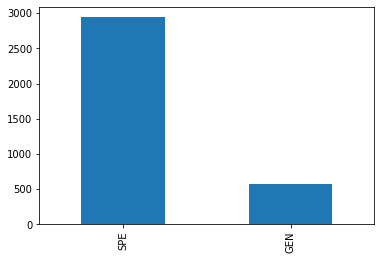

In [15]:
grants_df.prediction.value_counts().plot.bar()

Observations:

- country names make it into the input: Zambia
- zipcode address: "FL, 33199-0001", "SC, 29501-0548"